#**Лабораторная работа 1**
### Персептроны. Процедура обучения Розенблатта
Выполнил студент Ивченко Анна М8О-408

Вариант 8

Целью работы является исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.

Для начала выполнения программы загрузим используемые библиотеки:

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from tqdm import tqdm

#**Задание 1**

Построить и обучить сеть для правильного соотношения точек к двум классам

Сформируем наши данные:

In [34]:
x1 = [-2.8, -0.2, 2.8, -2.1, 0.3, -1]
y1 = [1.4, -3.5, -4, -2.7, -4.1, -4]
c1 = [0, 1, 1, 0, 1, 0]

In [35]:
list(zip(x1,y1))

[(-2.8, 1.4), (-0.2, -3.5), (2.8, -4), (-2.1, -2.7), (0.3, -4.1), (-1, -4)]

In [36]:
x_train = torch.FloatTensor(np.array(list(zip(x1,y1))))
y_train = torch.FloatTensor(np.array(c1))

Ниже опишем класс персерптрона

Класс `Perceptron` используется для создания перцептрона, простейшей нейронной сети, выполняющей бинарную классификацию. Она принимает на вход признаковое пространство `in_features` и возвращает бинарный результат `out_features`.


In [37]:
class Perceptron(nn.Module):
  def __init__ (self, in_features: int, out_features: int, bias: bool = True):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(in_features, out_features))
    self.bias = bias
    if bias:
      self.bias_term = nn.Parameter(torch.randn(out_features))

  def forward(self, x):
      x = x @ self.weights
      if self.bias:
         x +=self.bias_term
      return x

Создаем персептрон, который будет принимать два признака

loss_funtion - функция потерь

optimizer - оптимизатор

In [38]:
perceptron = Perceptron(2,1)
loss_funtion = nn.L1Loss()
optimizer = torch.optim.SGD(perceptron.parameters(),lr=0.05)

Определяем функцию обучения для бинарной классификации

In [39]:
def fit(model, x_train, y_train, criterion, optimizer, epochs):
  losses  = []
  log_template = "\Epoch {ep:03d} train_loss: {t_loss:0.4f}"
  with tqdm(desc="epoch", total=epochs) as pbar_outer:
    for epoch in range(epochs):
      optimizer.zero_grad()
      outp = model(x_train)

      probabilities = torch.sigmoid(outp.view(-1))
      loss = criterion(probabilities, y_train)

      loss.backward()
      losses.append(loss.detach().flatten()[0])
      optimizer.step()

      pbar_outer.update(1)
      tqdm.write(log_template.format(ep = epoch+1, t_loss = loss))
  return losses

Выполним обучение перцептрона `perceptron` на обучающей выборке `x_train` с соответствующими метками `y_train`

In [ ]:
losses = fit(perceptron, x_train, y_train, loss_funtion, optimizer, 1000)

Создадим график с изображением средней абсолютной ошибки (MAE)

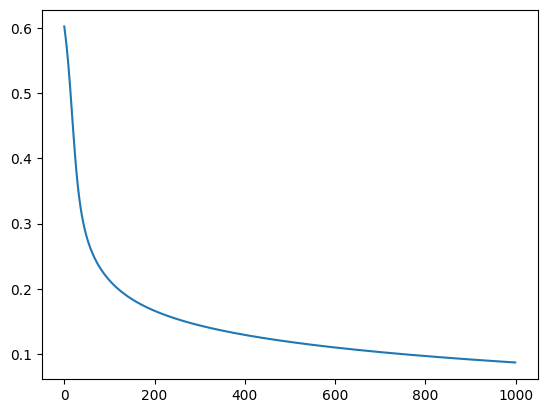

In [41]:
plt.plot(losses)
plt.show()

In [42]:
current_weights = perceptron.weights.detach().clone()
w = current_weights.flatten().numpy()

current_bias = perceptron.bias_term.detach().clone()
b = current_bias.flatten().numpy()

Создадим разделяющую прямую

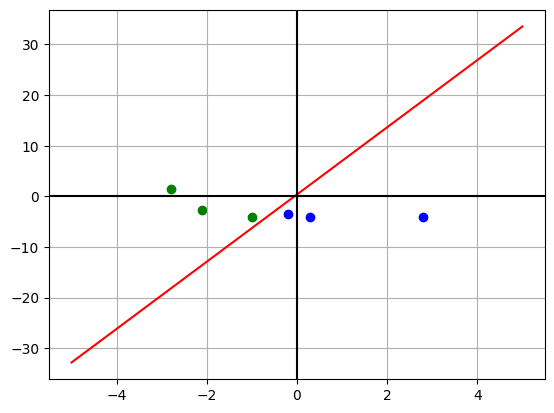

In [43]:
X = np.linspace(-5, 5, 100)
def discriminant(x):
  return(-x*w[0] - b[0])/w[1]

plt.plot(X, discriminant(X), "red")

plt.grid(True, which ='both')
plt.axvline(x=0, color ='k')
plt.axhline(y=0, color ='k')



for x, y, c in list(zip(x1, y1, y_train)):
  if (c == 1):
    plt.scatter(x, y, c="blue")
  else:
    plt.scatter(x, y, c="green")
plt.show()

# **Задание 2**

Рассмотрим теперь процесс для 4-х классового случая

In [44]:
x2 = [1.7, 4.7, -0.5, 1.8, 1.5, -1.3, -3.9, 4.7]
y2 = [3.3, -4.5, 0.8, 2.1, 2.2, 0.8, -4.5, -2.2]

c2_1 = [1, 0, 1, 1, 1, 1, 0, 0]
c2_2 = [1, 1, 0, 1, 1, 0, 0, 1]


In [45]:
list(zip(x2,y2))

[(1.7, 3.3),
 (4.7, -4.5),
 (-0.5, 0.8),
 (1.8, 2.1),
 (1.5, 2.2),
 (-1.3, 0.8),
 (-3.9, -4.5),
 (4.7, -2.2)]

In [46]:
x_train_2 = torch.FloatTensor(np.array(list(zip(x2,y2))))
y_train_2 = torch.FloatTensor(np.array(list(zip(c2_1, c2_2))))

Создаем второй персептрон, который принимает два признака и на выходе будет иметь два нейрона

In [48]:
perceptron2 = Perceptron(2,2)
loss_funtion = nn.L1Loss()
optimizer = torch.optim.SGD(perceptron2.parameters(),lr=0.05)

fit2 - функция для обучения нашей бинарной классификации

In [49]:
def fit2(model, x_train, y_train, criterion, optimizer, epochs):
  losses  = []
  log_template = "\Epoch {ep:03d} train_loss: {t_loss:0.4f}"
  with tqdm(desc="epoch", total=epochs) as pbar_outer:
    for epoch in range(epochs):
      optimizer.zero_grad()
      outp = model(x_train)

      probaba = torch.sigmoid(outp)
      loss1 = criterion(probaba[:, 0], y_train[:,0])
      loss2 = criterion(probaba[:, 1], y_train[:,1])
      loss = loss1 + loss2

      loss.backward()
      losses.append(loss.detach().flatten()[0])
      optimizer.step()

      pbar_outer.update(1)
      tqdm.write(log_template.format(ep = epoch+1, t_loss = loss))
  return losses

Обучим модель

In [ ]:
losses2 = fit2(perceptron2, x_train_2, y_train_2, loss_funtion, optimizer, 1000)

Посмотрим на график потерь, который вычисляет MAE

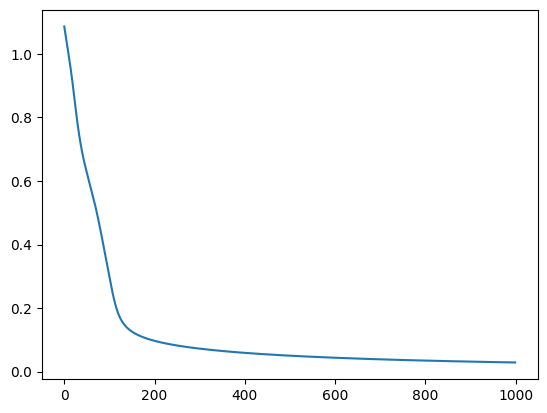

In [51]:
# График потерь
plt.plot(losses2)
plt.show()

In [52]:
current_weights = perceptron2.weights.detach().clone()
w = current_weights.numpy()

current_bias = perceptron2.bias_term.detach().clone()
b = current_bias.numpy()

In [53]:
def reverse_one_hot(arr):
  arr_new = []

  for i, y in enumerate(arr):
    arr_new.append(int(str(y[0]) + str(y[1]), 2))

  return np.array(arr_new)

Создадим разделяющую прямые

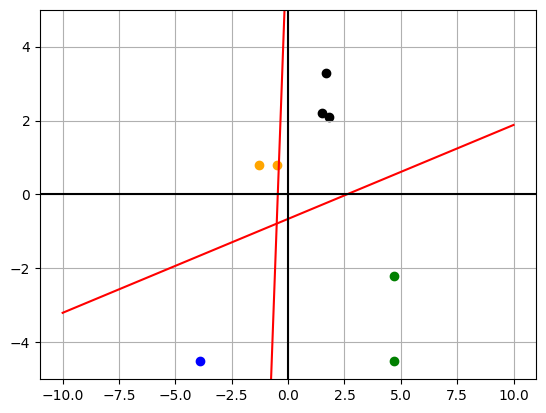

In [54]:
# Создание разделяющей прямой
X = np.linspace(-10, 10, 1000)

def discriminant1(x):
  return(-x*w[0][0] - b[0])/w[1][0]

def discriminant2(x):
  return(-x*w[0][1] - b[0])/w[1][1]

plt.plot(X, discriminant1(X), "red")
plt.plot(X, discriminant2(X), "red")

plt.grid(True, which ='both')
plt.axvline(x=0, color ='k')
plt.axhline(y=0, color ='k')


y_train_2 = reverse_one_hot(y_train_2.to(torch.int).numpy())

for x, y, c in list(zip(x2, y2, y_train_2)):
  if (c == 0):
    plt.scatter(x, y, c="blue")
  elif (c == 1):
    plt.scatter(x, y, c="green")
  elif (c == 2):
    plt.scatter(x, y, c="orange")
  else:
    plt.scatter(x, y, c="black")
plt.rcParams ['figure.figsize'] = [10, 4]
plt.ylim(-5, 5)
plt.show()

Вывод: В ходе проделанной работы, был изучен персептрон Розенблатта и его основные свойства. Персептрон представляет собой простую модель искусственной нейронной сети, используемую для решения задачи бинарной классификации. Мы рассмотрели процесс обучения персептрона на 2х и 4х классах. Данная лабораторная работа освежила мои знания, которые были получены на курсе "Искусственный интеллект"